Esta burbuja de codigo hace una solicitud a la pagina web para obtener los datos sobre los precios de la electricidad en un dia especifico y lo vamos a hacer con la herramienta requests para preguntar a la pagina web (API) por su datos.

In [19]:
import requests

def obtener_datos_api(data):
    url = "https://apidatos.ree.es/es/datos/mercados/precios-mercados-tiempo-real?start_date=2025-01-28T00:00&end_date=2025-01-29T20:00&time_trunc=hour"
    params = {
        "start_date": f"{data}T00:00",
        "end_date": f"{data}T23:59",
        "time_trunc": "hour"
    }
    respuesta = requests.get(url, params=params)
    if respuesta.status_code == 200:
        return respuesta.json()
    else:
        print("Error al obtener los datos.")
        return None


En esta Burbuja vamos a tomar los datos que recibimos de la API y los extraimos en dos cosas que queremos, en mi punto voy a extraer la horas y los precios por hora.

In [20]:
def extraer_precios_y_horas(datos):
    precios = datos["included"][0]["attributes"]["values"]
    horas = [item["datetime"][11:16] for item in precios]
    valores = [item["value"] for item in precios]
    return horas, valores


En esta Burbuja vamos a encontrar las horas con los precios mas baratos y mas caros y lo vamos a hacer combinado las listas de precios y horas con zip() para que cada precio tenga su hora correspondiente. Luego vamos a usar sorted() para ordenar los precios de menor a mayor para encotrnar la mas barata y de mayor a menor para las mas caras y luego vamos a seleccionar las primeras dos horas de cada lista(las dos mas baratas y las dos mas caras)

In [21]:
def calcular_horas_extremas(horas, valores):
    min_precios = sorted(zip(valores, horas))[:2]  # Las dos horas más baratas
    max_precios = sorted(zip(valores, horas), reverse=True)[:2]  # Las dos horas más caras
    return min_precios, max_precios


En esta burbuja vamos a calcular el precio promedio(la media) de todo el dia que tenemos seleccionado y lo vamos a hacer haciendo la suma de todos los precios con (sum(valores)), despues vamos a dividir la suma entre el numero de precio (len(valores)) para obtener la media del dia.

In [22]:
def calcular_media_dia(valores):
    return sum(valores) / len(valores) if valores else 0


En esta Burbuja vamos a imprimir los resultados en la pantalla para ver los datos.

In [23]:
def imprimir_resultados(horas, valores, min_precios, max_precios, media_dia):
    print("\nPrecios por hora (€/MWh):")
    for hora, precio in zip(horas, valores):
        print(f"{hora} - {precio} €/MWh")

    print("\nHoras más baratas:")
    for precio, hora in min_precios:
        print(f"{hora} - {precio} €/MWh")

    print("\nHoras más caras:")
    for precio, hora in max_precios:
        print(f"{hora} - {precio} €/MWh")

    print(f"\nMedia del día: {media_dia:.2f} €/MWh")


En esta Burbuja vamos a monstrar la grafica de barras con los precio por hora del dia que tenemos seleccionado y lo vamos a hacer con con la libreria matplotlib para crear una grafica teniendo en el eje x las horas y en el eje y los precios correspondientes.

In [24]:
import matplotlib.pyplot as plt

def generar_grafica(horas, valores, data):
    plt.bar(horas, valores)
    plt.title(f"Precios por hora del {data}")
    plt.xlabel("Hora")
    plt.ylabel("Precio (€/MWh)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


En esta Burbuja vamos a unir todos los datos 

In [25]:
def obtener_prezos_dia(data):
    datos = obtener_datos_api(data)
    if not datos:
        return

    horas, valores = extraer_precios_y_horas(datos)
    min_precios, max_precios = calcular_horas_extremas(horas, valores)
    media_dia = calcular_media_dia(valores)

    imprimir_resultados(horas, valores, min_precios, max_precios, media_dia)
    generar_grafica(horas, valores, data)


En esta Burbuja donde seleccionamos el dia que queremos calcular


Precios por hora (€/MWh):
00:00 - 53.78 €/MWh
01:00 - 53.49 €/MWh
02:00 - 55.94 €/MWh
03:00 - 54.77 €/MWh
04:00 - 54.73 €/MWh
05:00 - 54.48 €/MWh
06:00 - 56.12 €/MWh
07:00 - 59.91 €/MWh
08:00 - 105.31 €/MWh
09:00 - 96.5 €/MWh
10:00 - 136.92 €/MWh
11:00 - 135.58 €/MWh
12:00 - 134.03 €/MWh
13:00 - 131.51 €/MWh
14:00 - 66.36 €/MWh
15:00 - 66.43 €/MWh
16:00 - 69.82 €/MWh
17:00 - 82.4 €/MWh
18:00 - 196.5 €/MWh
19:00 - 219.39 €/MWh
20:00 - 207.92 €/MWh
21:00 - 194.39 €/MWh
22:00 - 112.59 €/MWh
23:00 - 101.63 €/MWh

Horas más baratas:
01:00 - 53.49 €/MWh
00:00 - 53.78 €/MWh

Horas más caras:
19:00 - 219.39 €/MWh
20:00 - 207.92 €/MWh

Media del día: 104.19 €/MWh


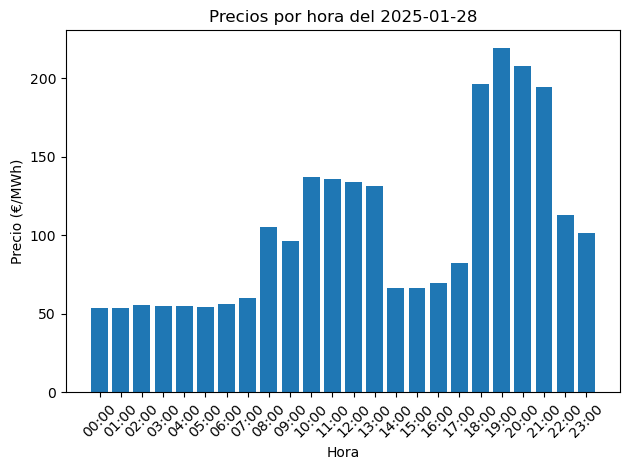

In [26]:
obtener_prezos_dia("2025-01-28")
